# Working with a `Perceptron`

## Getting data ready

In [1]:
from perceptron import Perceptron
from utils import plot_decision_regions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
1,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
2,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
3,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


In [5]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [8]:
df[4].head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 4, dtype: object

In [9]:
df[4].unique(), type(df[4])

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 pandas.core.series.Series)

In [10]:
df.loc[:, [4]].head(), type(df.loc[:, [4]])

(             4
 0  Iris-setosa
 1  Iris-setosa
 2  Iris-setosa
 3  Iris-setosa
 4  Iris-setosa,
 pandas.core.frame.DataFrame)

In [11]:
df.loc[:, [4]].columns

Int64Index([4], dtype='int64')

In [12]:
df.loc[:, [4]][4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
type(y)

numpy.ndarray

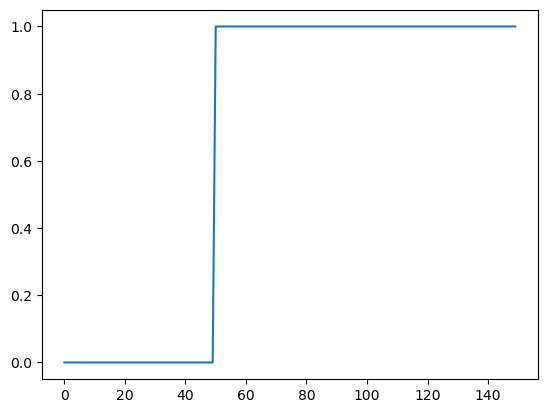

In [14]:
plt.plot(y)
plt.show()

In [15]:
X = df.iloc[:, [0,2]].values
type(X)

numpy.ndarray

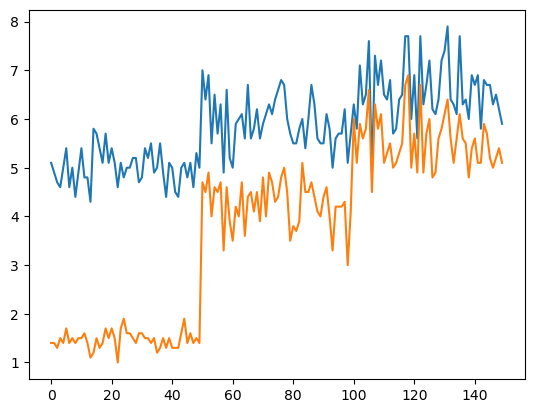

In [16]:
plt.plot(X)
plt.show()

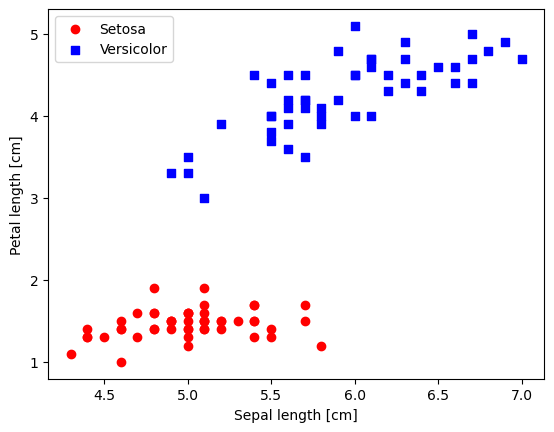

In [17]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Perceptron fitting

In [18]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

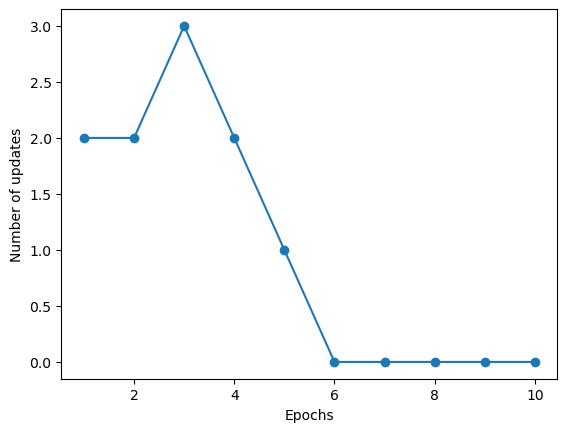

In [19]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Binary Classification using the Perceptron

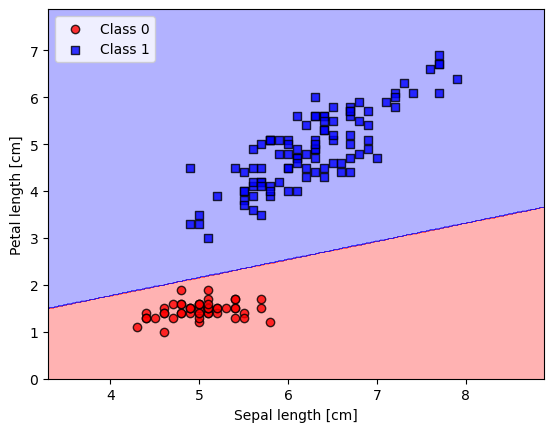

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()